# Background analysis (MSAP4-01B)

This notebook provide an example of background fitting as will be performed by PLATO MSAP4-01B.

The current implementation of this part of the MSAP4-01 module wraps the **apollinaire** ([Breton et al. 2022](https://www.aanda.org/articles/aa/abs/2022/07/aa43330-22/aa43330-22.html), the API documentation is available [here](https://apollinaire.readthedocs.io/en/latest/index.html)) implementation of background MCMC fitting. 

In [1]:
import plato_msap4_demonstrator as msap4
import plato_msap4_demonstrator_datasets.kepler_short_cadence as kepler_short_cadence

In [2]:
import importlib
import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists ('background_analysis') :
    os.mkdir ('background_analysis')

In [3]:
filename = msap4.get_target_filename (kepler_short_cadence, '003733735')
t, s, dt = msap4.load_resource (filename)

In [4]:
period, psd = msap4.compute_lomb_scargle (t, s, normalisation='psd', return_object=False)
freq, psd = 1e6/(period*86400), psd

In order to estimate the background parameters before running the MCMC, we use mass, radius and effective temperature from the DR25 (Mathur et al. 2017).
Note that **apollinaire** also allows using $\nu_\mathrm{max}$ and $\Delta \nu$ to compute these estimates.  

Beginning fit


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:43<00:00,  1.71it/s]


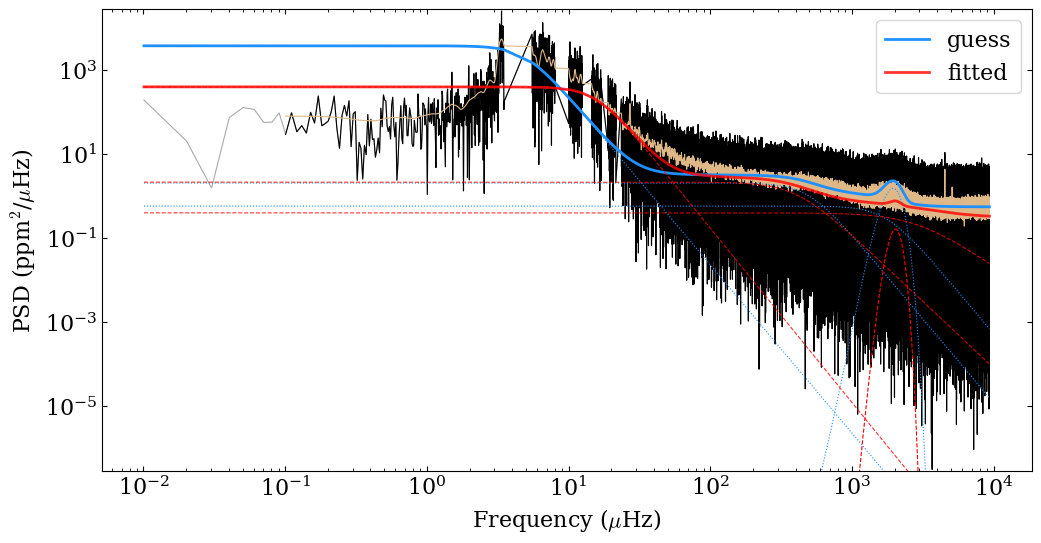

In [6]:
param, sigma = msap4.fit_background_model (freq, psd, quickfit=True,
                                           r=1.375, m=1.303, teff=6676, 
                                           remove_rotation_harmonics=True,
                                           filename='background_analysis/003733735.png',
                                           filemcmc='background_analysis/003733735.h5',
                                           num=500)